## Mini Project III

In [423]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sklearn as sk
import numpy as np
import seaborn as sns
sns.set_theme()
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler 
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

In [424]:
#Import CSV files and format

customer_df = pd.read_csv('../data/twm_customer.csv', delimiter = ';')
accounts_df = pd.read_csv('../data/twm_accounts.csv', delimiter = ';')
trans_df = pd.read_csv('../data/twm_transactions.csv', delimiter = ';')
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [425]:
customer_df.columns

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'name_prefix', 'first_name', 'last_name',
       'street_nbr', 'street_name', 'postal_code', 'city_name', 'state_code'],
      dtype='object')

In [426]:
customer_df.name_prefix.value_counts()

            505
Ms.          92
Mr.          82
Mrs.         31
Dr.          22
Miss         15
Name: name_prefix, dtype: int64

In [427]:
customer_df.marital_status.value_counts()

2    353
1    276
4     70
3     48
Name: marital_status, dtype: int64

In [428]:
customer_df[['marital_status', 'age', 'name_prefix']].groupby(['marital_status', 'name_prefix']).count()

age
marital_status name_prefix     
1                           214
               Dr.            4
               Miss          15
               Mr.           14
               Ms.           29
2                           214
               Dr.           15
               Mr.           52
               Mrs.          23
               Ms.           49
3                            29
               Dr.            2
               Mr.            6
               Mrs.           2
               Ms.            9
4                            48
               Dr.            1
               Mr.           10
               Mrs.           6
               Ms.            5

In [429]:
customer_df[['marital_status', 'age']].groupby('marital_status').describe()

age                                                     
                count       mean        std   min   25%   50%    75%   max
marital_status                                                            
1               276.0  29.927536  17.284838  13.0  16.0  19.0  42.25  84.0
2               353.0  50.796034  16.091475  21.0  37.0  52.0  61.00  89.0
3                48.0  46.416667  14.974920  23.0  33.0  46.0  56.00  78.0
4                70.0  47.328571  16.346538  22.0  35.0  42.5  58.00  88.0

In [430]:
# drop columns
customer_df = customer_df.drop(['name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name'], axis =1)
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,10138,New York City,NY


In [431]:
customer_df.shape

(747, 10)

In [432]:
customer_df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,98186.000000


In [433]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   postal_code      747 non-null    int64 
 8   city_name        747 non-null    object
 9   state_code       747 non-null    object
dtypes: int64(7), object(3)
memory usage: 58.5+ KB


In [434]:
customer_df['cust_id'] = customer_df['cust_id'].map(str)
customer_df['postal_code'] = customer_df['postal_code'].map(str)
customer_df['marital_status'] = customer_df['marital_status'].map(str)

In [435]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    object
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    object
 7   postal_code      747 non-null    object
 8   city_name        747 non-null    object
 9   state_code       747 non-null    object
dtypes: int64(4), object(6)
memory usage: 58.5+ KB


In [436]:
#check for nulls
total_nulls = customer_df.isnull().sum().sort_values(ascending=False)
percent = (customer_df.isnull().sum()/customer_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_nulls, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cust_id,0,0.0
income,0,0.0
age,0,0.0
years_with_bank,0,0.0
nbr_children,0,0.0
gender,0,0.0
marital_status,0,0.0
postal_code,0,0.0
city_name,0,0.0
state_code,0,0.0


In [437]:
# check for zeros
count_income_zero = (customer_df['income'] == 0).sum()/len(customer_df['income'])
count_years_with_bank_zero = (customer_df['years_with_bank'] == 0).sum()/len(customer_df['income'])
count_nbr_children_zero = (customer_df['nbr_children'] == 0).sum()/len(customer_df['income'])
print(count_income_zero) # 14% appropriate for retire, unployed, students and children, do not remove
print(count_years_with_bank_zero) #11% less than a year, approriate, do not remove
print(count_nbr_children_zero) #62% appropriate that there would be a high % of 0 children

0.13654618473895583
0.11780455153949129
0.6238286479250335


In [438]:
# check for negative values
count_income_zero = (customer_df['income'] < 0).sum()/len(customer_df['income'])
count_years_with_bank_zero = (customer_df['years_with_bank'] < 0).sum()/len(customer_df['income'])
count_nbr_children_zero = (customer_df['nbr_children'] < 0).sum()/len(customer_df['income'])
print(count_income_zero) # 14% appropriate for retire, unployed, students and children, do not remove
print(count_years_with_bank_zero) #11% less than a year, approriate, do not remove
print(count_nbr_children_zero) #62% appropriate that there would be a high % of 0 children

0.0
0.0
0.0


In [439]:
#Log transform of income for right skew
#customer_df["income"] = customer_df["income"].apply(np.log)

<AxesSubplot: xlabel='income', ylabel='Density'>

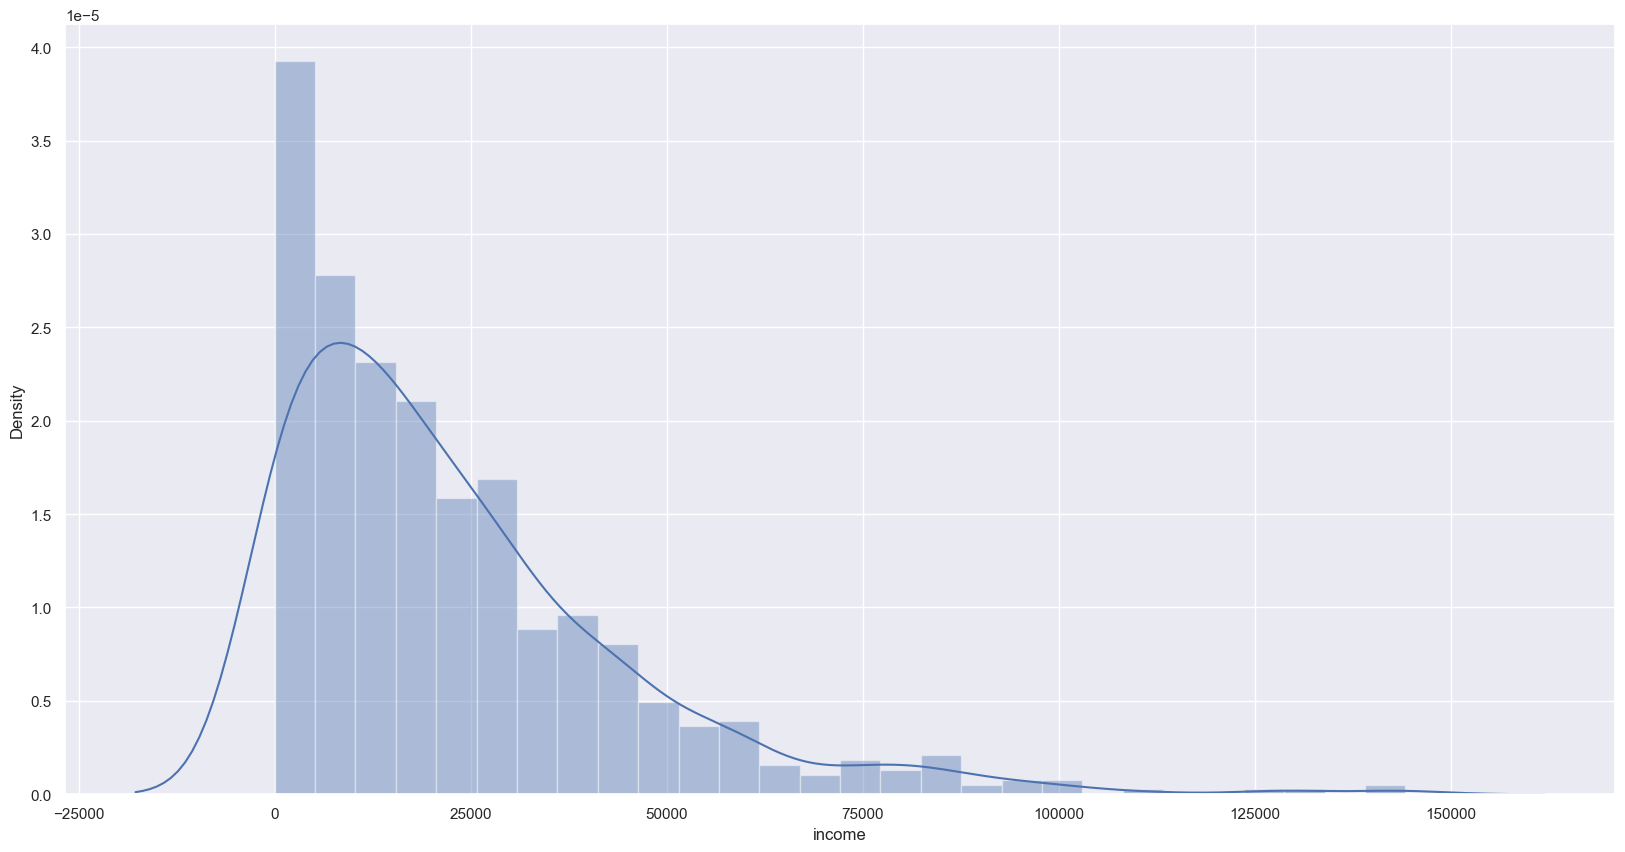

In [440]:
sns.distplot(customer_df["income"]) # heavily screwed to the right

In [441]:
#apply a constant to allow for the inclusion of zero income. 
#customer_df["income"] = customer_df["income"] + 17000

In [442]:
#df_log_income = customer_df["income"].apply(np.log)
#sns.histplot(df_log_income) #log transform centres data but creates errors for later scaling due to log 0 = undefined

<AxesSubplot: xlabel='income', ylabel='Count'>

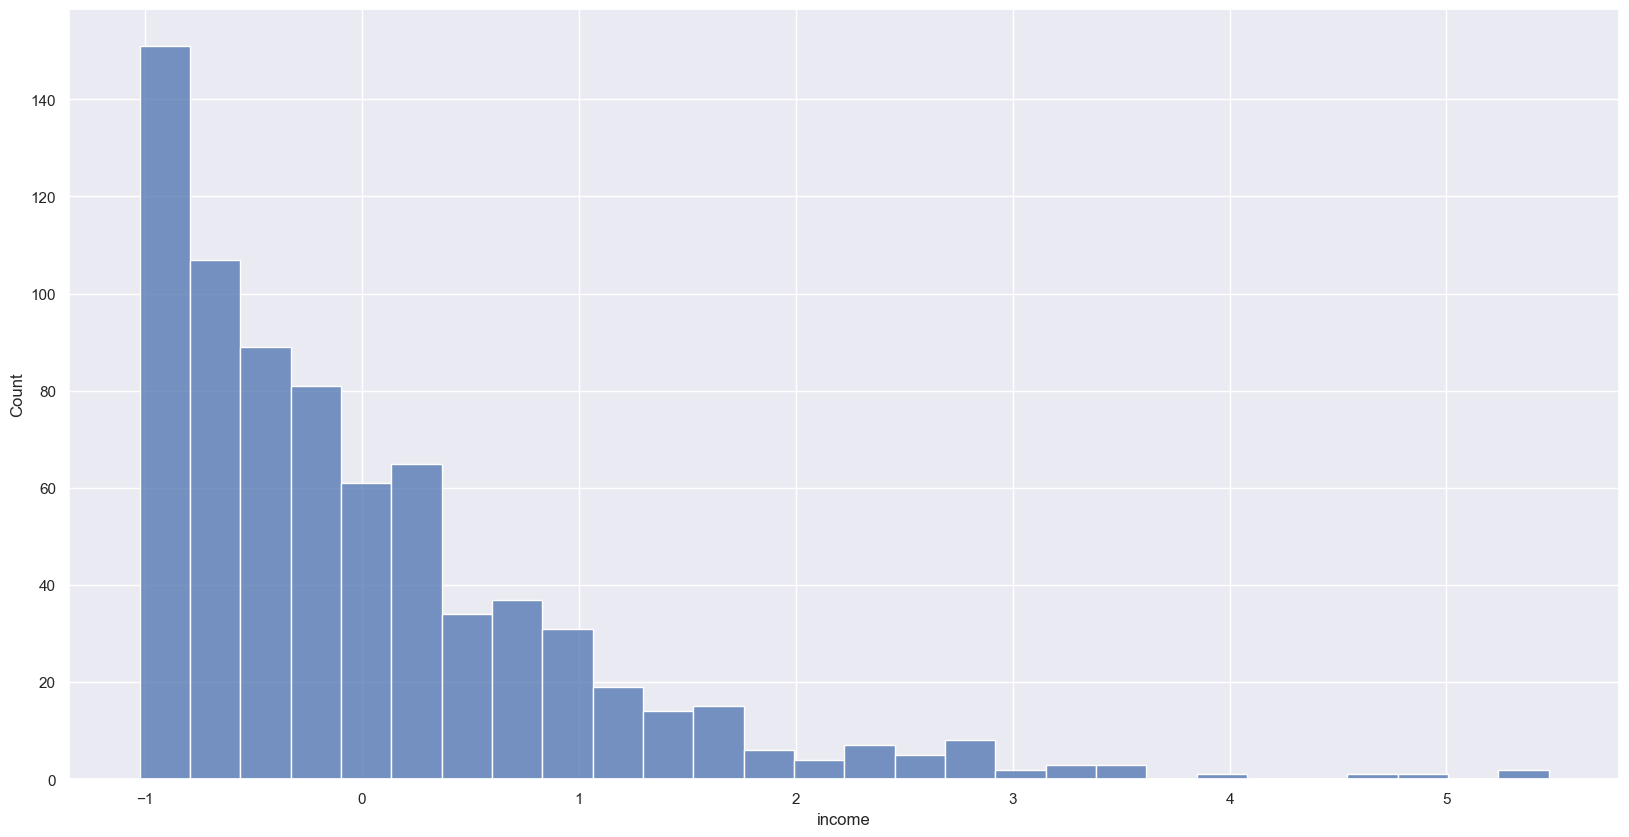

In [443]:
#standardize
df_z_scale = stats.zscore(customer_df['income'], axis=0)
sns.histplot(df_z_scale)

<AxesSubplot: xlabel='income', ylabel='age'>

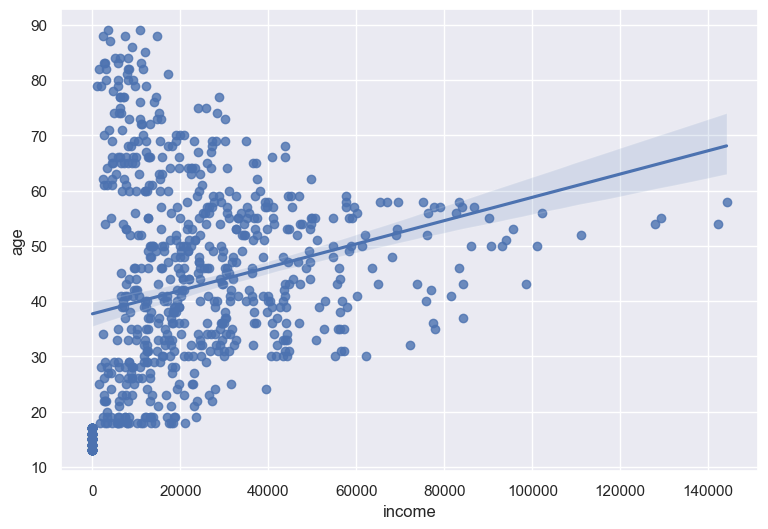

In [444]:
f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(customer_df["income"]), y=customer_df["age"], data=customer_df, order=1)

Interesting.  Most of the 0 income values are a result of teens.  Taking a closer look:

In [445]:
no_income_df = customer_df[customer_df['income']==0]
no_income_df[['age', 'income']].groupby('income').value_counts()

income  age
0       15     32
        17     21
        16     19
        13     15
        14     15
dtype: int64

It's likely these no income values can be safely excluded for further data analyzing income, since it is likely these customers have these accounts secondary to the assistance of their parent's incomes.

>_Future note: It might be worth determining if there are adults with children with the same last names at the same bank, to determine if the sum of these account balances are dependently linked to the parent's income and balances_

----
# LOG TRANSFORM
----

In [446]:
# # Skip Log transform - values with 0 incomes
# customer_df2 = customer_df.copy()
# print(customer_df.shape)
# customer_df2 = customer_df[~customer_df.isin(no_income_df)].dropna()
# print(customer_df2.shape)

In [447]:
# # Log transform - values with 0 incomes
# print(customer_df.shape)
# customer_df = customer_df[~customer_df.isin(no_income_df)].dropna()
# print(customer_df2.shape)

In [448]:
# Log transform + values with 0 incomes (by adding small constant to all incomes)
print(customer_df.shape)
customer_df['income'] = customer_df['income'] + 1
# print(customer_df.shape)

(747, 10)


----
# LOG TRANSFORM
----

<AxesSubplot: xlabel='income', ylabel='Count'>

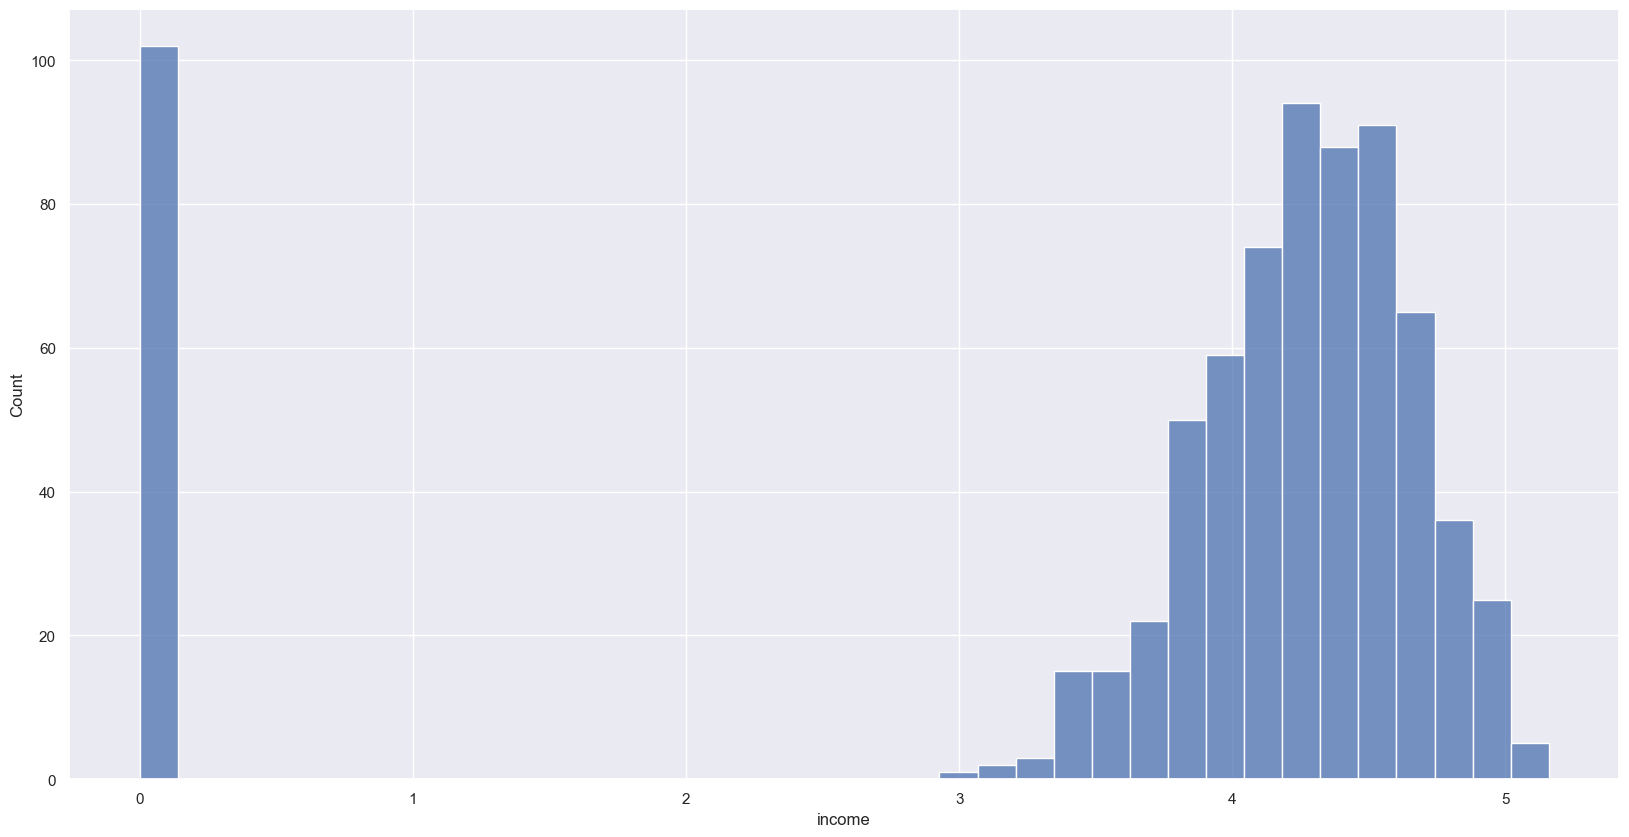

In [449]:
df_log_income = customer_df["income"].apply(np.log10)
sns.histplot(df_log_income)

<AxesSubplot: xlabel='income', ylabel='age'>

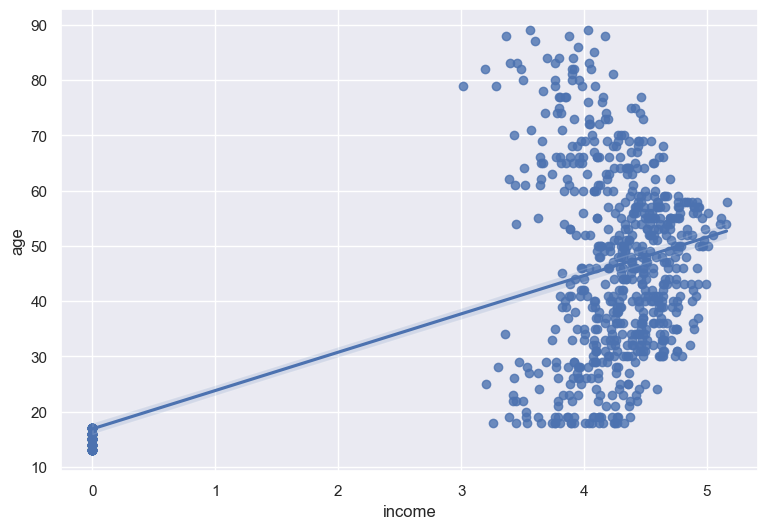

In [450]:
f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(df_log_income), y=customer_df["age"], data=customer_df, order=1)

(-0.5, 0.5, 0.0, 200000.0)

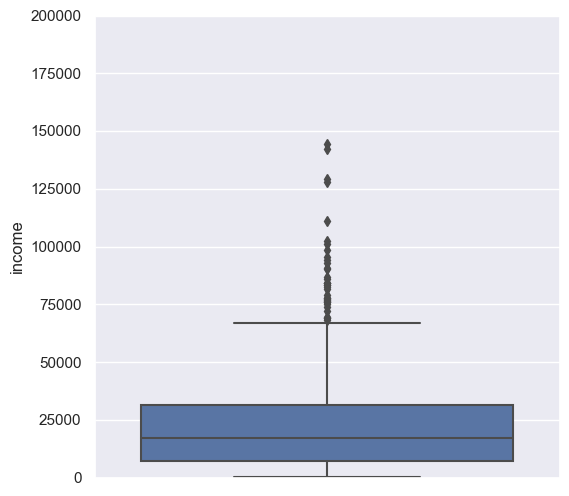

In [451]:
#var = 
f, ax = plt.subplots(figsize=(6, 6))
data = customer_df[['income']]
fig = sns.boxplot(y="income", data=data)
fig.axis(ymin=0, ymax=200000)

<AxesSubplot: xlabel='age', ylabel='Density'>

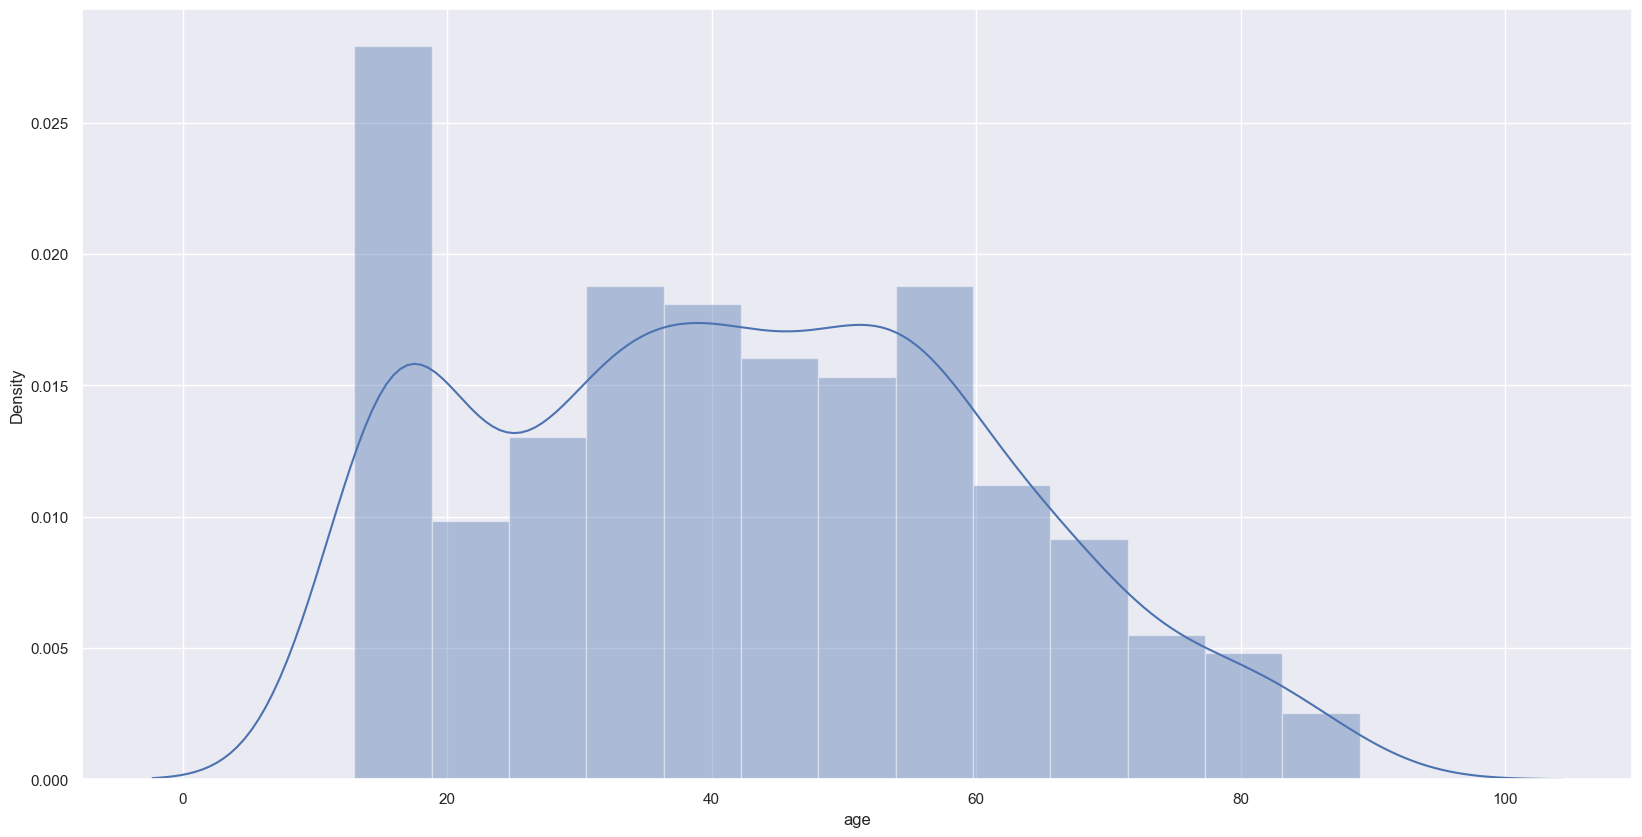

In [452]:
sns.distplot(customer_df["age"]) 

<AxesSubplot: xlabel='nbr_children', ylabel='count'>

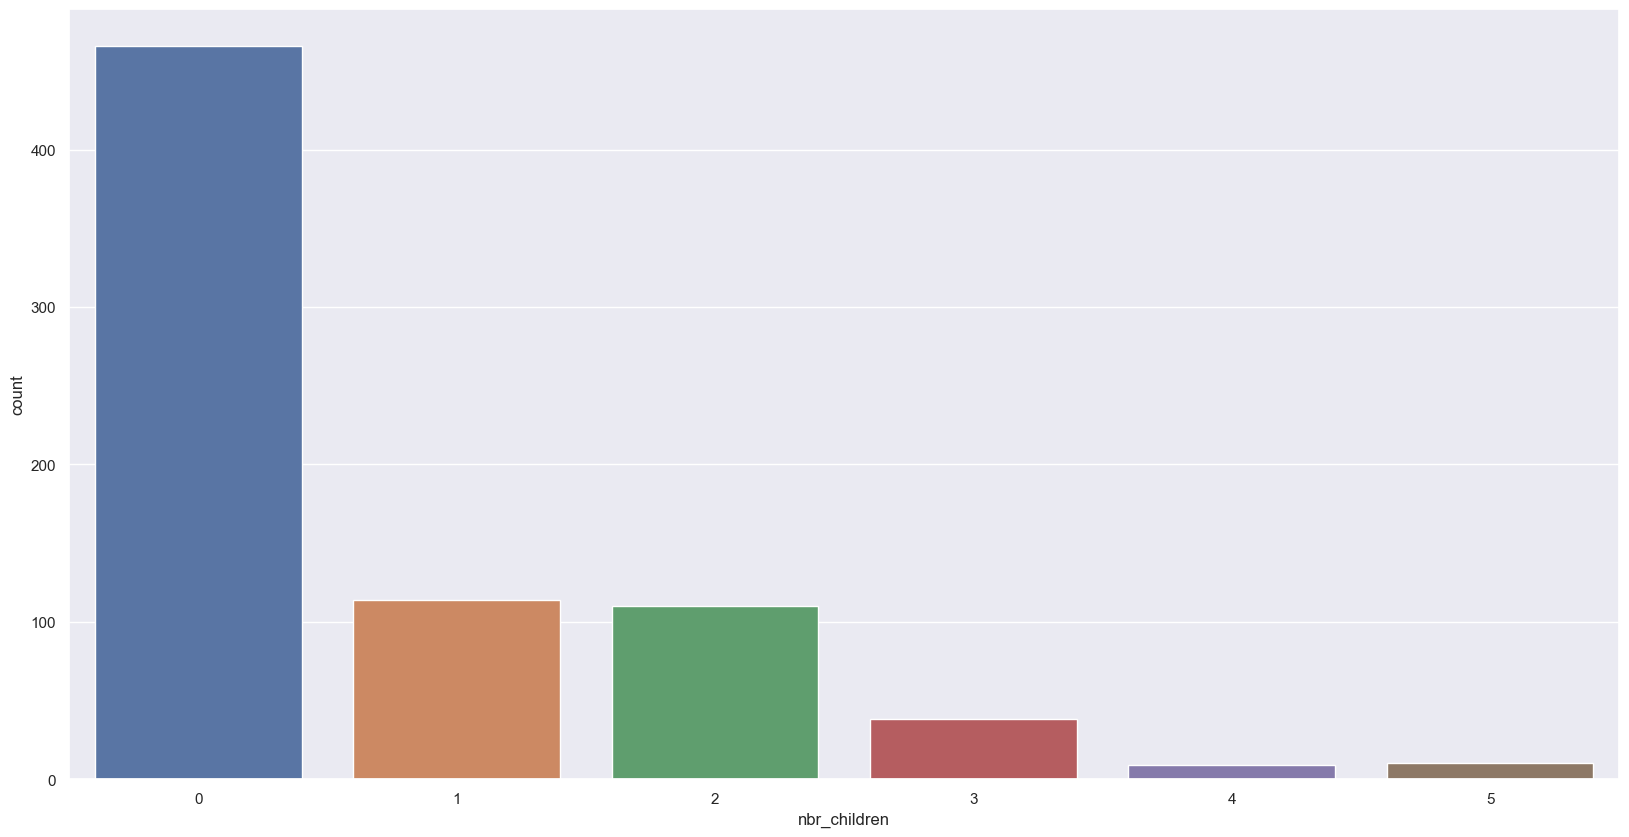

In [453]:
sns.countplot(data=customer_df, x="nbr_children")

<AxesSubplot: xlabel='years_with_bank', ylabel='Density'>

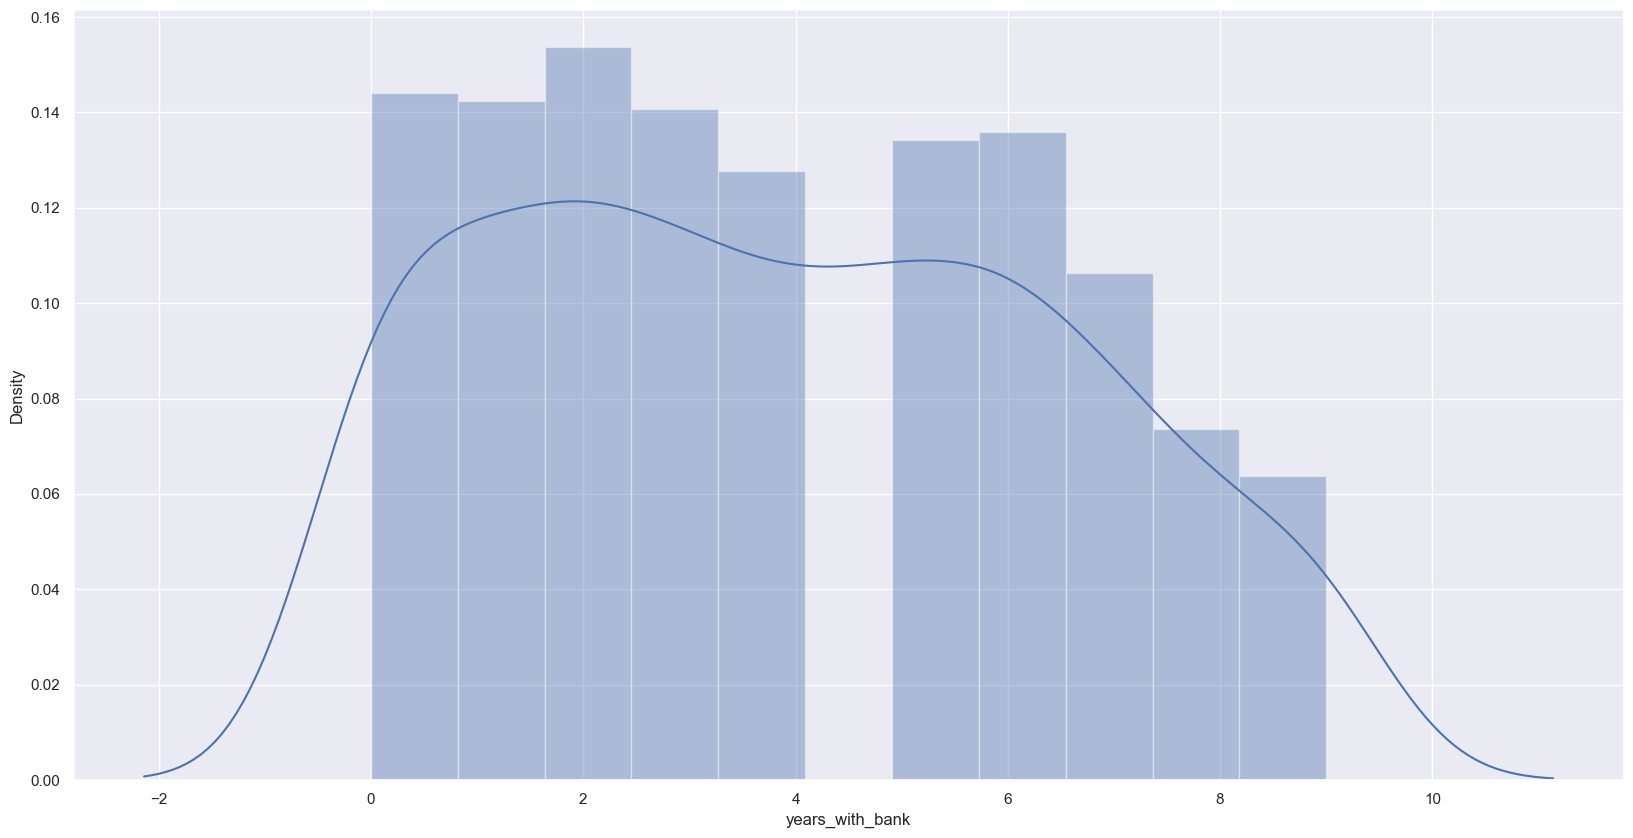

In [454]:
sns.distplot(customer_df["years_with_bank"])

<AxesSubplot: xlabel='years_with_bank', ylabel='age'>

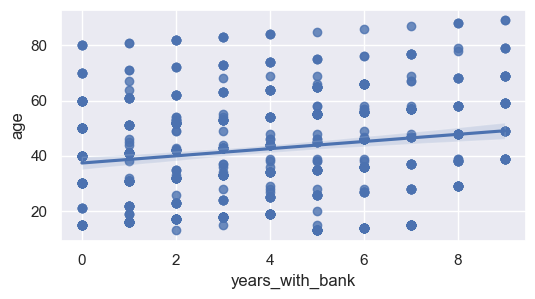

In [455]:
f, ax = plt.subplots(figsize=(6, 3))
# seaborn's regression plot
sns.regplot(x=(customer_df["years_with_bank"]), y=customer_df["age"], data=customer_df, order=1) #ignore regression line just interested in scatter. 
#

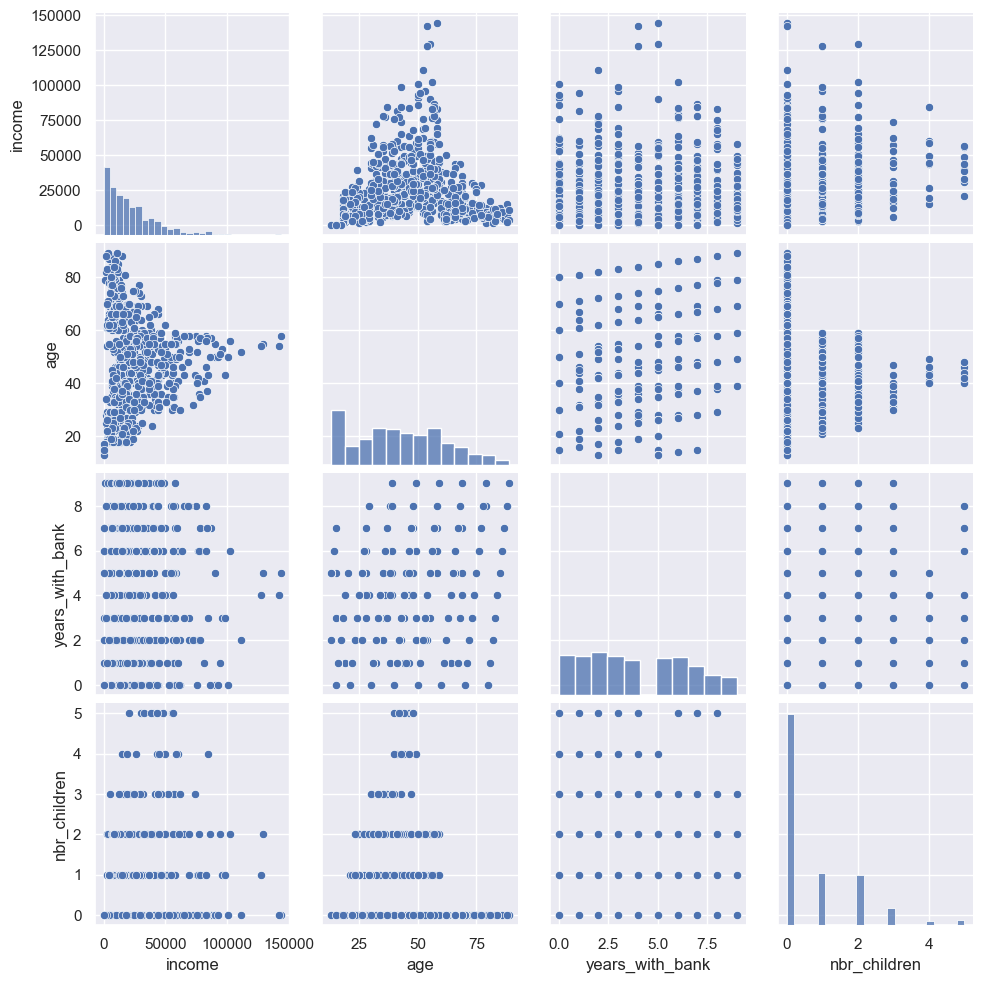

In [456]:
sns.pairplot(data=customer_df)
plt.show()

In [457]:
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code
0,1362691,26151,46,5,1,M,2,89194,Las Vegas,NV
1,1362487,6606,71,1,0,M,2,90159,Los Angeles,CA
2,1363160,18549,38,8,0,F,1,90024,Los Angeles,CA
3,1362752,47669,54,3,0,F,1,90172,Los Angeles,CA
4,1362548,44555,59,9,2,F,4,10138,New York City,NY


In [458]:
customer_df = customer_df.reset_index()
customer_df.head()

,index,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code
0,0,1362691,26151,46,5,1,M,2,89194,Las Vegas,NV
1,1,1362487,6606,71,1,0,M,2,90159,Los Angeles,CA
2,2,1363160,18549,38,8,0,F,1,90024,Los Angeles,CA
3,3,1362752,47669,54,3,0,F,1,90172,Los Angeles,CA
4,4,1362548,44555,59,9,2,F,4,10138,New York City,NY


In [459]:
customer_df_std_trans = customer_df.copy()
cols = ['income',	'age', 'years_with_bank', 'nbr_children']
cols_scaled = ['income_scaled',	'age_scaled', 'years_with_bank_scaled', 'nbr_children_scaled']
scaler = StandardScaler()
customer_df_std_trans[cols_scaled] = scaler.fit_transform(customer_df_std_trans[cols])
customer_df_std_trans.head()

,index,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code,income_scaled,age_scaled,years_with_bank_scaled,nbr_children_scaled
0,0,1362691,26151,46,5,1,M,2,89194,Las Vegas,NV,0.154185,0.184312,0.408539,0.258591
1,1,1362487,6606,71,1,0,M,2,90159,Los Angeles,CA,-0.726524,1.493070,-1.087435,-0.648298
2,2,1363160,18549,38,8,0,F,1,90024,Los Angeles,CA,-0.188366,-0.234490,1.530520,-0.648298
3,3,1362752,47669,54,3,0,F,1,90172,Los Angeles,CA,1.123798,0.603115,-0.339448,-0.648298
4,4,1362548,44555,59,9,2,F,4,10138,New York City,NY,0.983479,0.864867,1.904514,1.165479


In [460]:
customer_df_rob_trans = customer_df
cols = ['income',	'age', 'years_with_bank', 'nbr_children']
cols_scaled = ['income_scaled',	'age_scaled', 'years_with_bank_scaled', 'nbr_children_scaled']
scaler = RobustScaler()
customer_df_rob_trans[cols_scaled] = scaler.fit_transform(customer_df_rob_trans[cols])
customer_df_rob_trans.head()

,index,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code,income_scaled,age_scaled,years_with_bank_scaled,nbr_children_scaled
0,0,1362691,26151,46,5,1,M,2,89194,Las Vegas,NV,0.367803,0.142857,0.25,1.0
1,1,1362487,6606,71,1,0,M,2,90159,Los Angeles,CA,-0.439192,1.035714,-0.75,0.0
2,2,1363160,18549,38,8,0,F,1,90024,Los Angeles,CA,0.053923,-0.142857,1.00,0.0
3,3,1362752,47669,54,3,0,F,1,90172,Los Angeles,CA,1.256260,0.428571,-0.25,0.0
4,4,1362548,44555,59,9,2,F,4,10138,New York City,NY,1.127686,0.607143,1.25,2.0


In [461]:
customer_df_rob_trans.loc[customer_df_rob_trans['income_scaled'] == 0]

,index,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code,income_scaled,age_scaled,years_with_bank_scaled,nbr_children_scaled
63,63,1362973,17243,60,0,0,F,1,19155,Philadelphia,PA,0.0,0.642857,-1.0,0.0


In [462]:
customer_df_std_trans.loc[customer_df_std_trans['income_scaled'] == 0]

,index,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code,income_scaled,age_scaled,years_with_bank_scaled,nbr_children_scaled


<AxesSubplot: xlabel='income_scaled', ylabel='Density'>

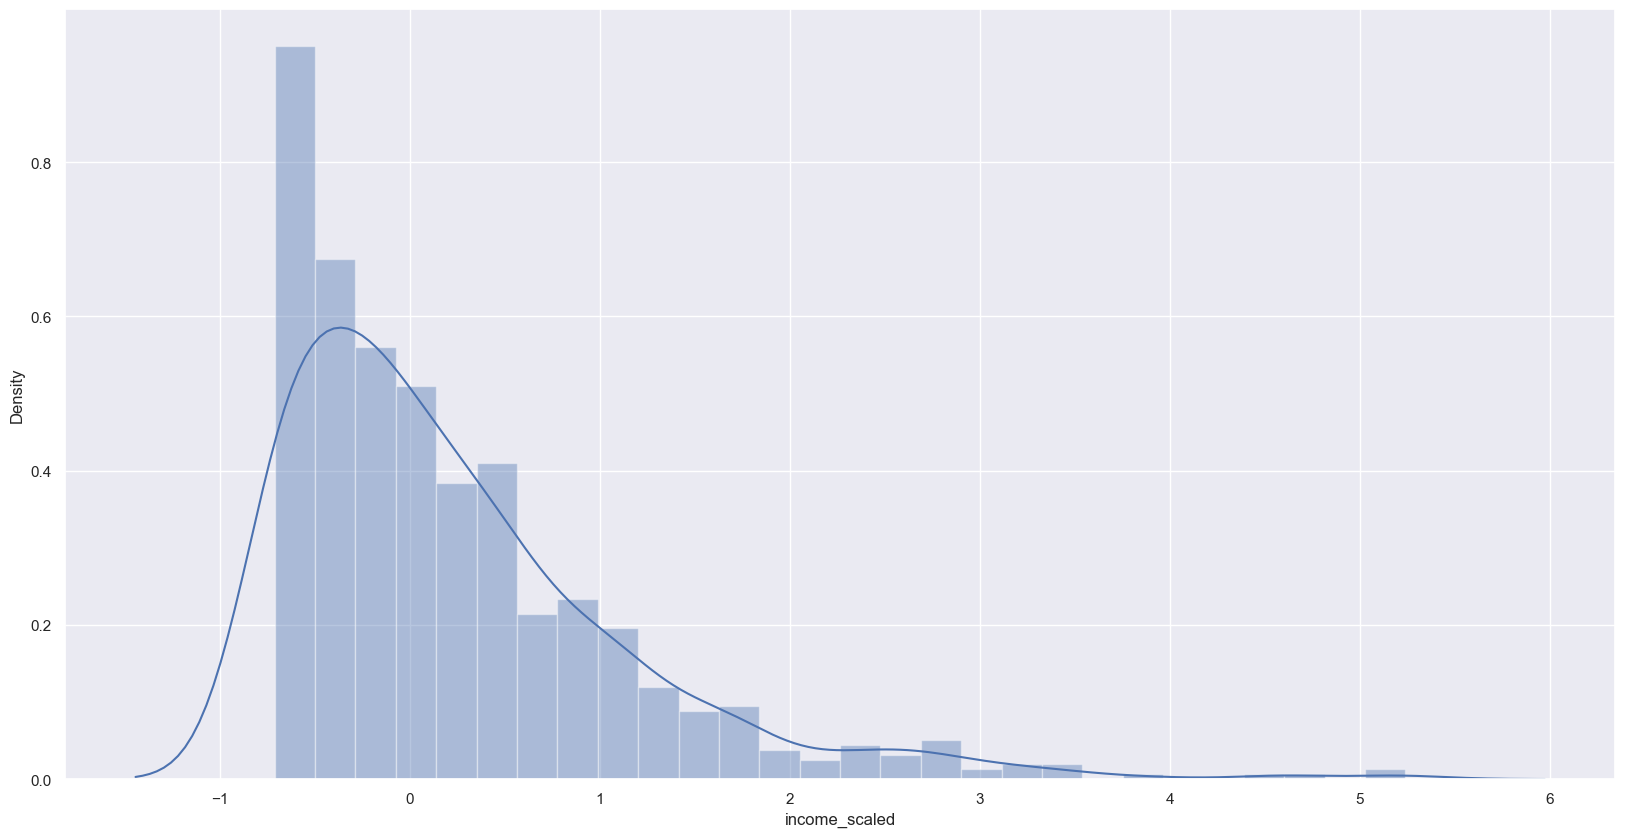

In [463]:
sns.distplot(customer_df_rob_trans["income_scaled"])

<AxesSubplot: xlabel='income_scaled', ylabel='Density'>

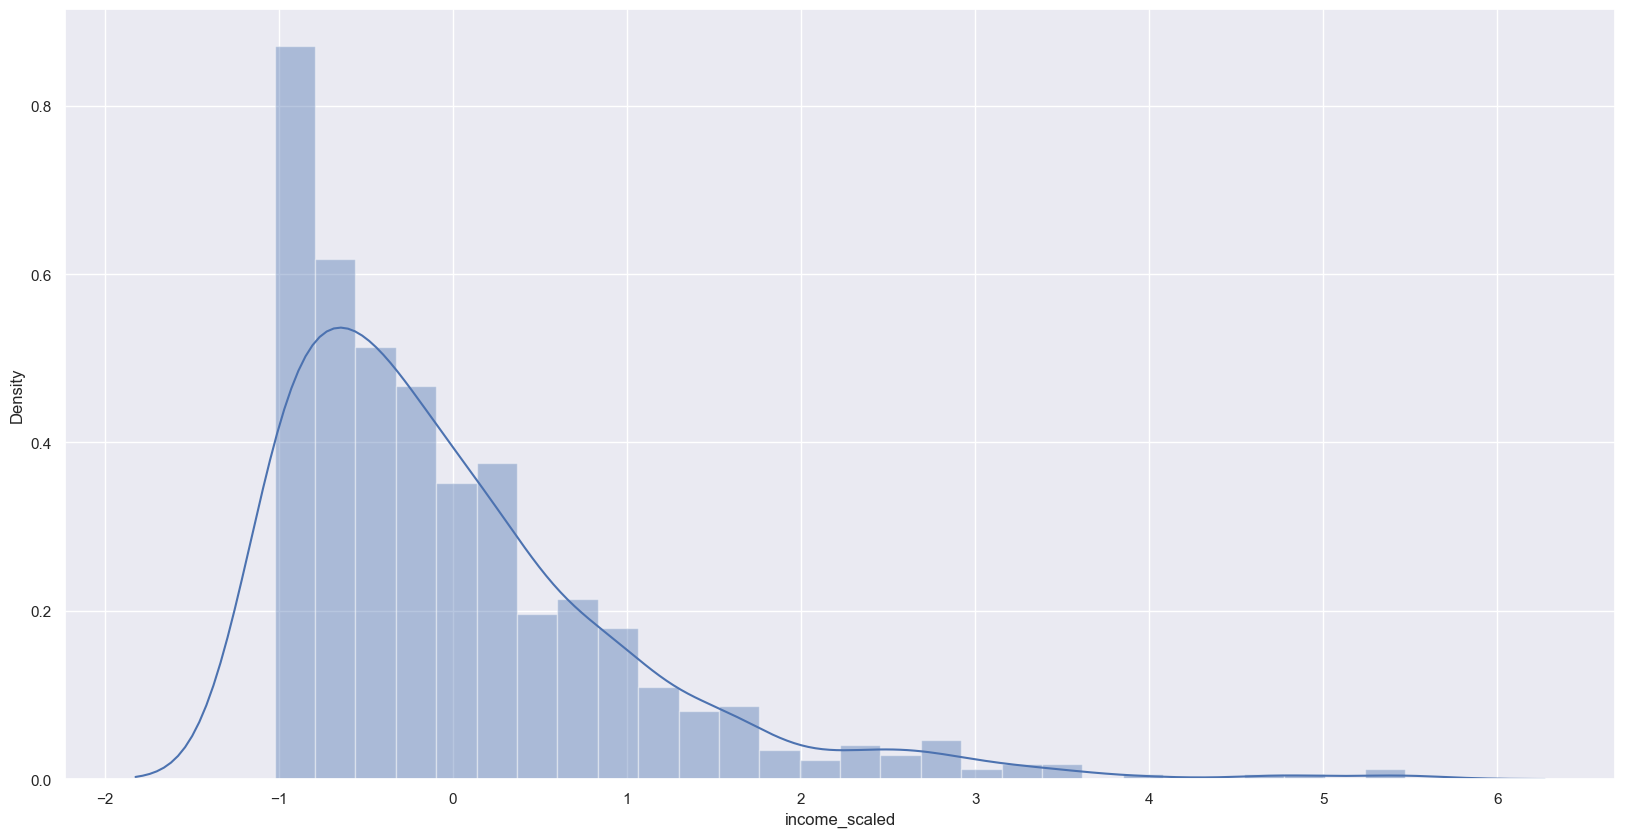

In [464]:
sns.distplot(customer_df_std_trans["income_scaled"])

In [465]:
#DB Scan Pre PCA
X = customer_df_rob_trans[['income_scaled',	'age_scaled', 'years_with_bank_scaled', 'nbr_children_scaled']]
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 190


In [466]:
# large number of noise points suggests a lot of outliers. Likely due to high dimensionality or the made up epsilon 

In [467]:
# use nearest neighbours to find optimal epsilon
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

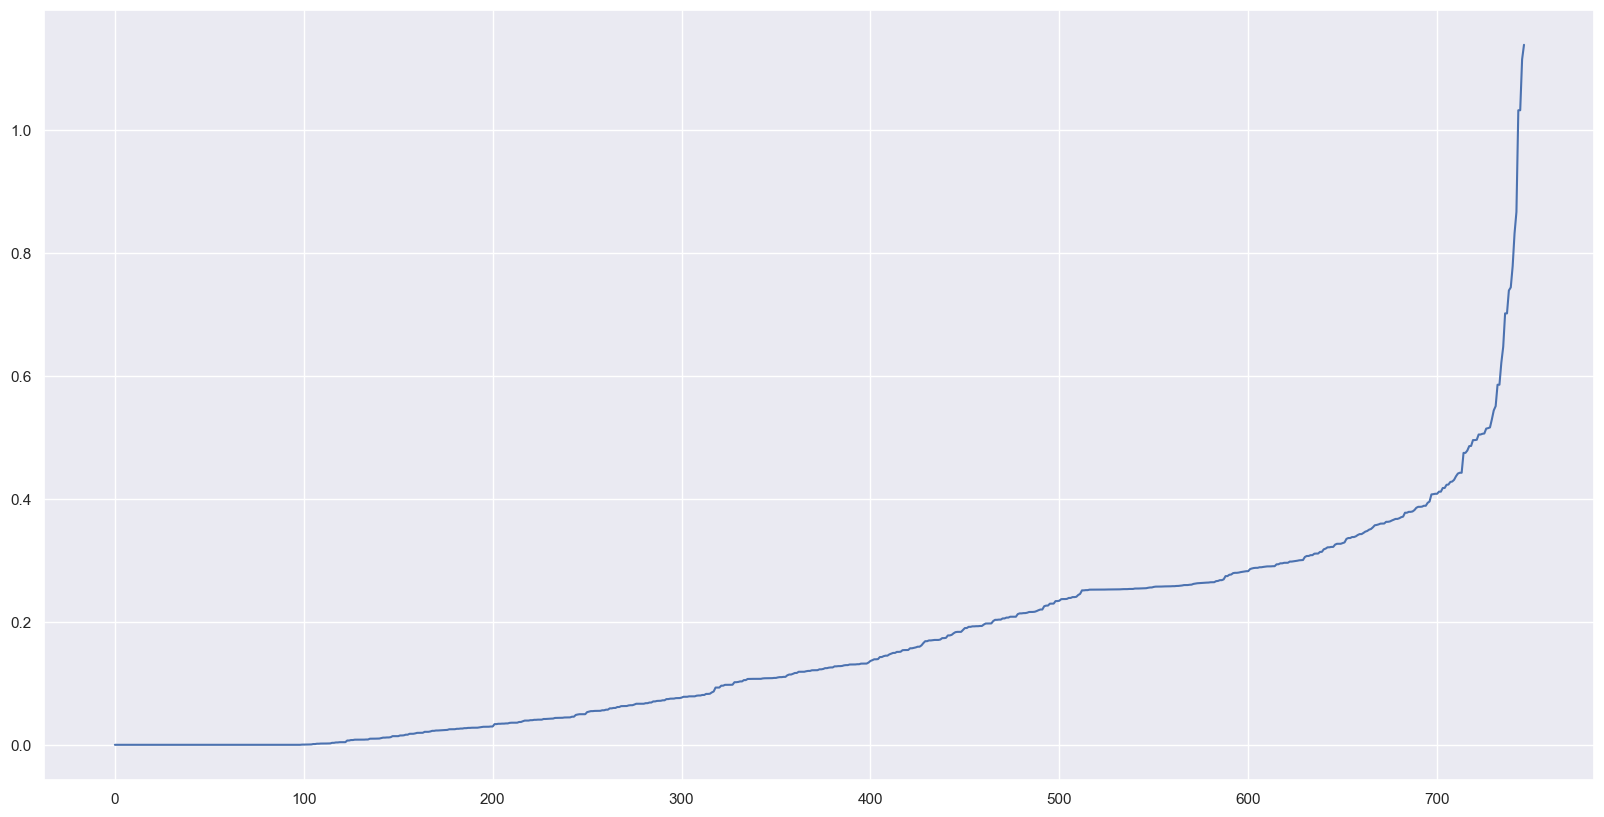

In [468]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [469]:
# from plot approximately 0.4 looks to be a strong candidate for epsilon
# min samples estimated at 8. taken as 2*n_dim

In [470]:
#DB Scan Repeat with optimsed epsilon
X = customer_df_rob_trans[['income_scaled',	'age_scaled', 'years_with_bank_scaled', 'nbr_children_scaled']]
# Compute DBSCAN
db = DBSCAN(eps=0.4, min_samples=8).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 223


In [471]:
#Optimise with PCA
cov = np.cov(X.T)   # .T b/c numpy wants varibles along rows rather than down columns?
print("covariance matrix =\n",cov)


covariance matrix =
 [[ 0.84073301  0.15330807  0.024904    0.28667663]
 [ 0.15330807  0.46604412  0.08287136 -0.04308309]
 [ 0.024904    0.08287136  0.44743855 -0.02569527]
 [ 0.28667663 -0.04308309 -0.02569527  1.21751349]]


In [472]:
from numpy import linalg as LA
lambdas, vs = LA.eig(cov)
lambdas, vs

(array([1.37360999, 0.78049664, 0.47093615, 0.34668638]),
 array([[ 0.48181616,  0.74136578, -0.37225106,  0.28223946],
        [ 0.03912011,  0.47441451,  0.40269606, -0.78181607],
        [-0.00782968,  0.20645326,  0.81336468,  0.54383236],
        [ 0.87536364, -0.42741631,  0.19417239, -0.11554601]]))

In [473]:
D2 = vs[:,0:2]
D3 = vs[:,0:3]

proj_PCA_D2 = X @ D2
proj_PCA_D3 = X @ D3

print(proj_PCA_D2.shape)
print(proj_PCA_D3.shape)

(747, 2)
(747, 3)


In [474]:
proj_PCA_D3.head()

,0,1,2
0,1.056208,-0.035353,0.318127
1,-0.165220,0.010916,-0.029456
2,0.012563,0.178657,0.735764
3,0.624010,1.083056,-0.498401
4,2.308029,0.527299,1.229762


In [475]:
#  proj_PCA_D2 plot 
fig = go.Figure(data=[go.Scatter(x=proj_PCA_D2[0], y=proj_PCA_D2[1],# z=Y, #z=proj_digits[:,2],
                mode='markers', marker=dict(size=6, opacity=0.7))])
fig.update_layout( xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=0, y=0, z=1.5)))
fig.show()

In [476]:
fig = go.Figure(data=[go.Scatter3d(x=proj_PCA_D3[0], y=proj_PCA_D3[1], z=proj_PCA_D3[2],
                mode='markers', marker=dict(size=4, opacity=0.8, showscale=True) )])
fig.update_layout(title="8x8 Handwritten Digits", xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

In [477]:
#DB Scan Post PCA proj_PCA_D3
X = proj_PCA_D3
# Compute DBSCAN
db = DBSCAN(eps=0.4, min_samples=8).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 119


In [478]:
X.head()

,0,1,2
0,1.056208,-0.035353,0.318127
1,-0.165220,0.010916,-0.029456
2,0.012563,0.178657,0.735764
3,0.624010,1.083056,-0.498401
4,2.308029,0.527299,1.229762


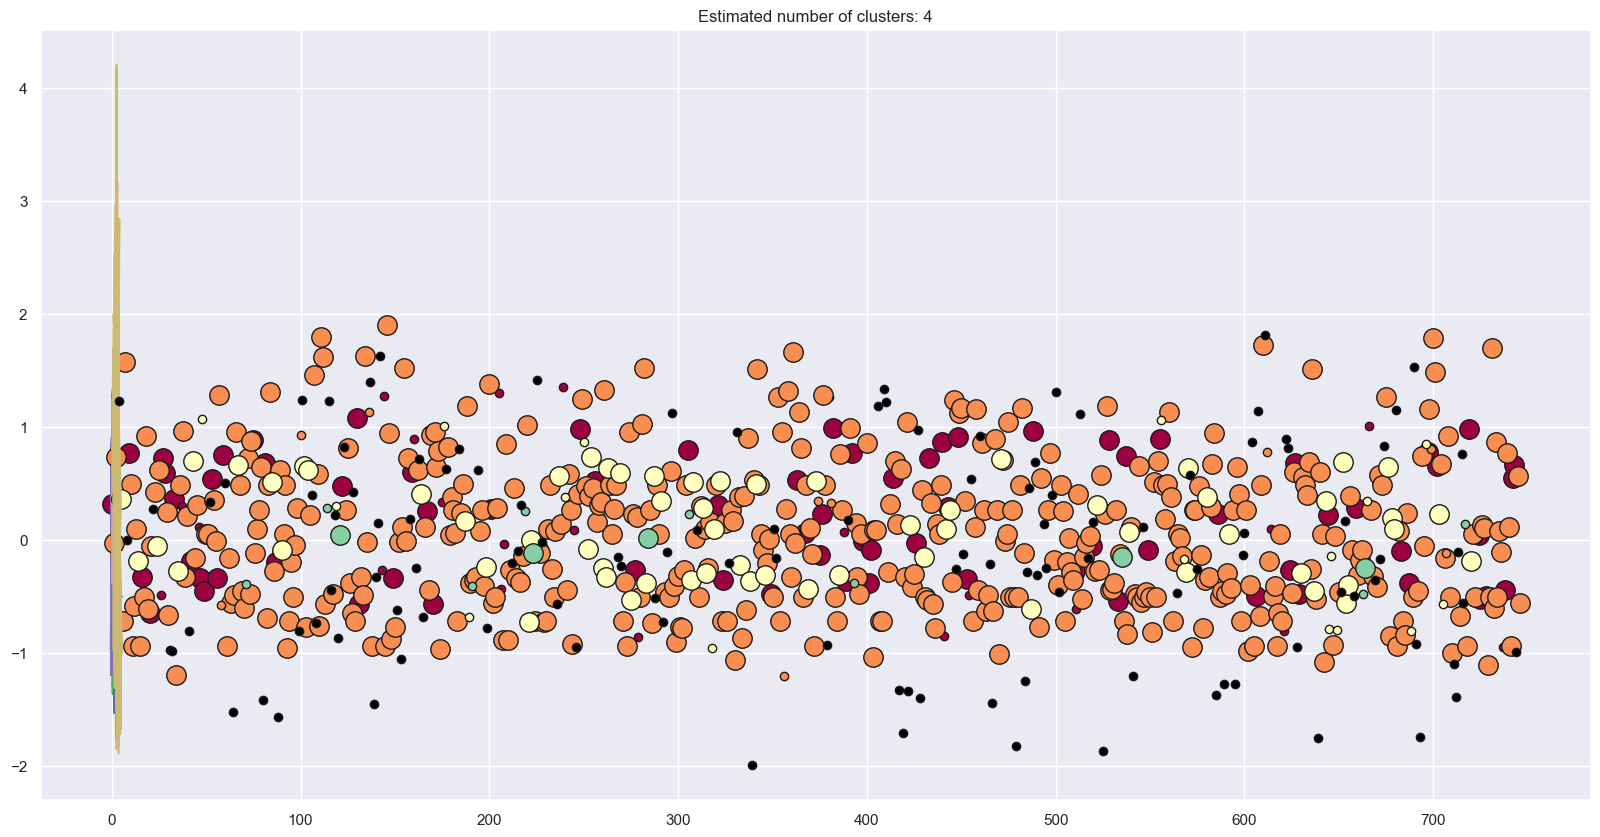

In [479]:
# Plot result proj_PCA_D3
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[0], xy[1], xy[2],  'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[0], xy[1], xy[2], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()

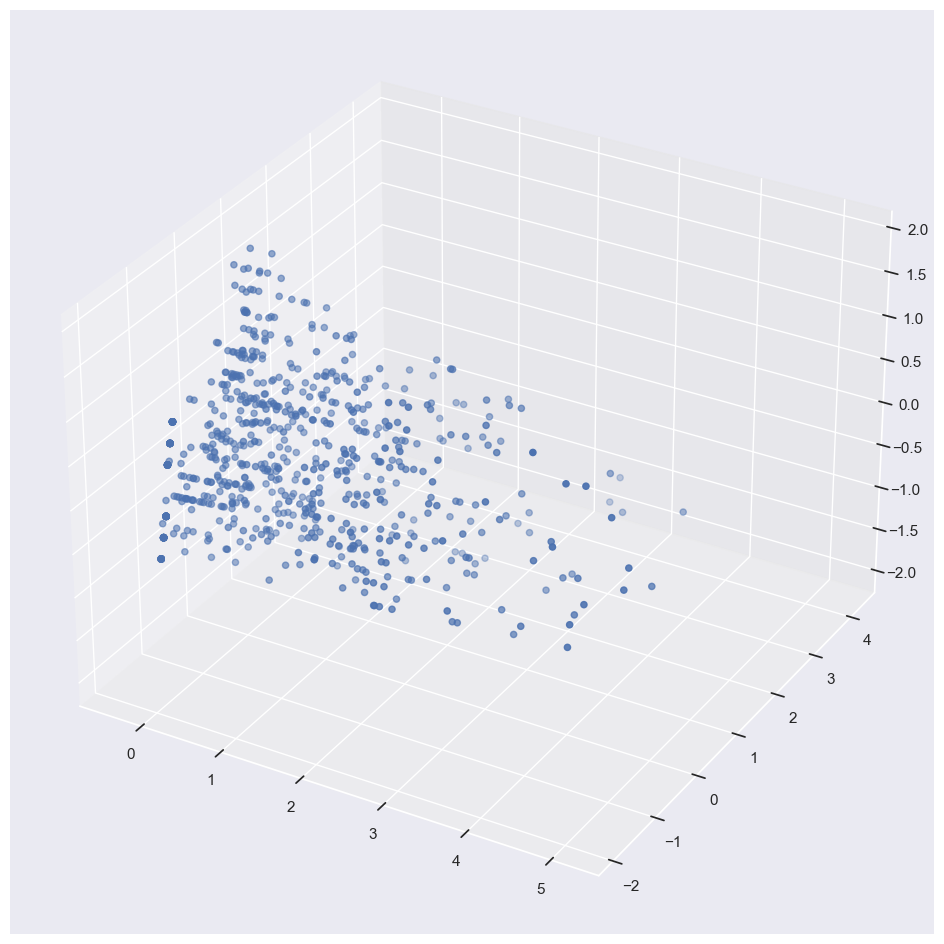

In [480]:
# plot the above in 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(X[0],X[1], X[2])
plt.show()

#figure out how to layer labels from 

In [481]:
#DB Scan Post PCA proj_PCA_D2
X = proj_PCA_D2
# Compute DBSCAN
db = DBSCAN(eps=0.4, min_samples=8).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 40


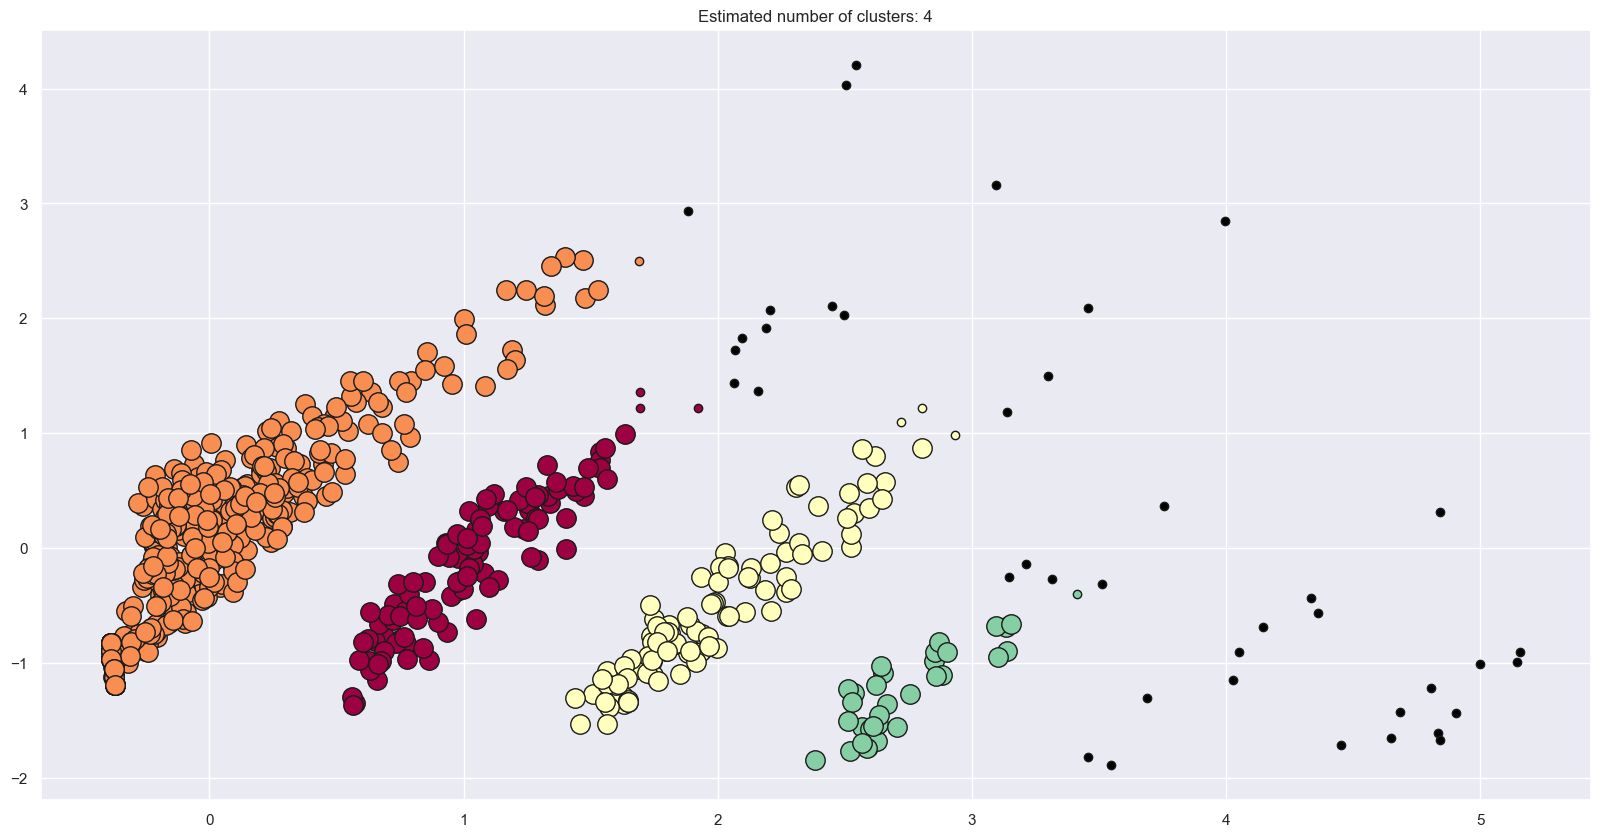

In [482]:
# Plot result proj_PCA_D2
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[0], xy[1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[0], xy[1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()